---
# Guía Ley de los Grandes Números y Teorema del Límite Central

Lea y ejecute las instrucciones de este notebook. Resuelva los desafíos planteados.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Ley de Los Grandes Números

La Ley de los Grandes Números es un concepto fundamental en la teoría de la probabilidad y la estadística. Esta ley establece que, a medida que aumenta el número de ensayos o experimentos, la media de los resultados se aproxima al valor esperado de la variable aleatoria.

En otras palabras, la Ley de los Grandes Números indica que, si realizamos un gran número de experimentos independientes bajo las mismas condiciones, la media de los resultados tiende a converger hacia el valor esperado de la distribución a medida que aumenta el tamaño de la muestra.

Utilicemos nuevamente el ejemplo del lanzamiento de la moneda, en el primer ejemplo, la moneda va a tener la misma posibilidad de caer en cara o sello. Primero que nada, calcularemos la Esperanza de la variable aleatoria y después veremos si efectivamente el teorema del límite central se aproxima a este valor.

In [ ]:
# Calcule el valor esperado de la variable aleatoria.
valores = np.array([0, 1])
probabilidades = np.array([0.5, 0.5])
esperanza = np.sum(valores * probabilidades)
print(f"Valor esperado (E[X]) = {esperanza:.2f}")

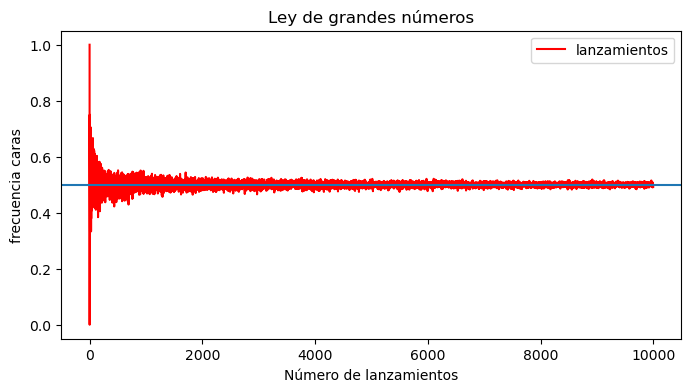

In [8]:
# Ejemplo ley de grandes números
# moneda p=1/2 cara=1 sello=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos) 
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 4))
plt.axhline(0.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

In [ ]:
# ¿Se condicen los resultados obtenidos?
ultimo_promedio = resultados[-1]
print(f"Último promedio observado: {ultimo_promedio:.4f}")
print("La media de las proporciones se aproxima a 0.5, en línea con la Ley de los Grandes Números.")

Ahora, vamos a suponer que la moneda está cargada y que caerá cara sólo 1 de 6 veces.

In [ ]:
# Calcule el valor esperado de la variable aleatoria cargada.
valores = np.array([0, 1])
probabilidades = np.array([5/6, 1/6])
esperanza_cargada = np.sum(valores * probabilidades)
print(f"Valor esperado (E[X]) = {esperanza_cargada:.4f}")

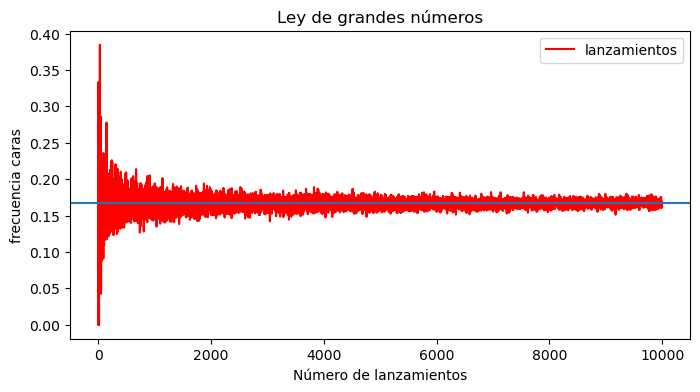

In [15]:

# moneda p=1/6 cara=1 sello=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos, p=[5/6, 1/6]) 
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 4))
plt.axhline(1/6)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

In [ ]:
# ¿Se condicen los resultados obtenidos?
ultimo_promedio_cargado = resultados[-1]
print(f"Último promedio observado: {ultimo_promedio_cargado:.4f}")
print("La frecuencia simulada converge hacia 1/6, validando la teoría con la moneda cargada.")

La Ley de los Grandes Números es un concepto fundamental en estadística y es ampliamente utilizada en la teoría y práctica para comprender el comportamiento de muestras grandes y el cálculo de estimaciones precisas a partir de datos muestrales.


## Teorema del Límite Central

El Teorema del Límite Central es un concepto fundamental en estadística que establece que, bajo ciertas condiciones, la distribución de la suma (o el promedio) de un gran número de variables aleatorias independientes e idénticamente distribuidas tiende a ser una distribución normal, independientemente de la forma de la distribución original.

En términos más simples, el Teorema del Límite Central nos dice que cuando sumamos o promediamos un gran número de observaciones independientes de una población, la distribución de esas sumas o promedios se aproximará a una distribución normal, sin importar qué forma tenga la distribución original de los datos.

Esto es importante porque permite que utilicemos las propiedades de la distribución normal para hacer inferencias sobre la población, incluso si no conocemos la distribución exacta de los datos originales. El Teorema del Límite Central es fundamental en muchos métodos estadísticos y se utiliza ampliamente en la inferencia estadística, la estimación de intervalos de confianza y las pruebas de hipótesis.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import expon
from scipy.stats import uniform

### Para una distribución exponencial

In [23]:
poblacion_expo = pd.DataFrame()
poblacion_expo['number'] = expon.rvs(10, size = 100000)

<Axes: >

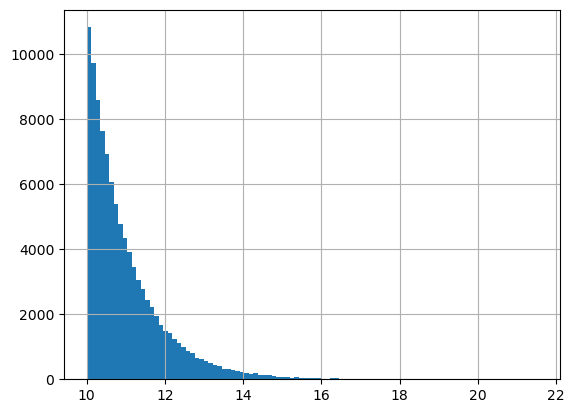

In [24]:
poblacion_expo['number'].hist(bins=100)

In [27]:
muestra_promedio_dis_expo = []

tamano = 5000

for i in range(0,tamano):
  muestra_promedio_dis_expo.append(poblacion_expo.sample(n=100).mean().values[0])

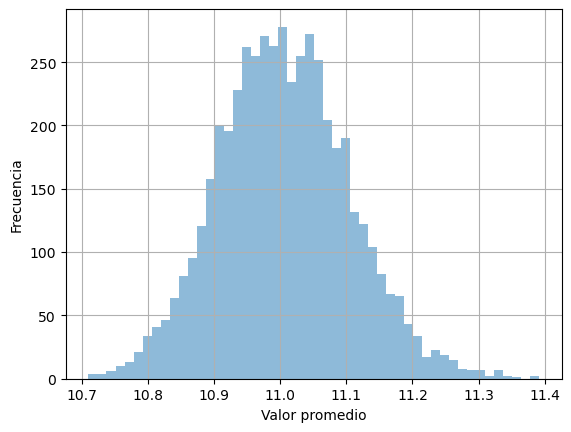

In [29]:
fig, ax = plt.subplots()
ax.hist(muestra_promedio_dis_expo, bins=50, alpha = 0.5)
ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.grid()

### Para una distribución uniforme

In [31]:
poblacion_uniforme = pd.DataFrame()
poblacion_uniforme['number'] = uniform.rvs(10, size = 100000)

<Axes: >

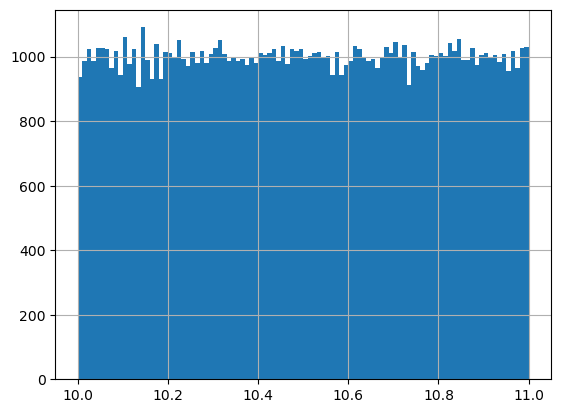

In [32]:
poblacion_uniforme['number'].hist(bins=100)

In [33]:
muestra_promedio_pob_uniforme = []

tamano = 5000

for i in range(0,tamano):
  muestra_promedio_pob_uniforme.append(poblacion_uniforme.sample(n=100).mean().values[0])

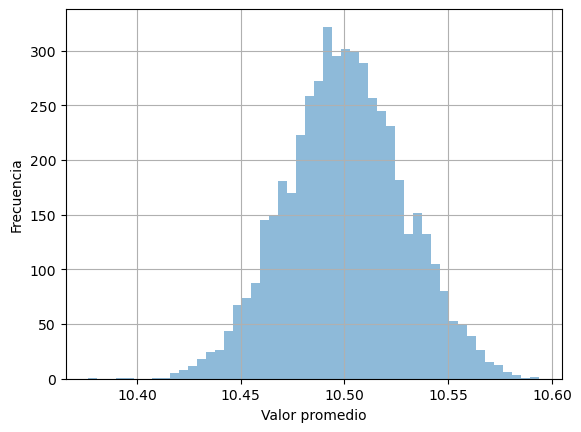

In [34]:
fig, ax = plt.subplots()
ax.hist(muestra_promedio_pob_uniforme, bins=50, alpha = 0.5)
ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.grid()

Comparación:

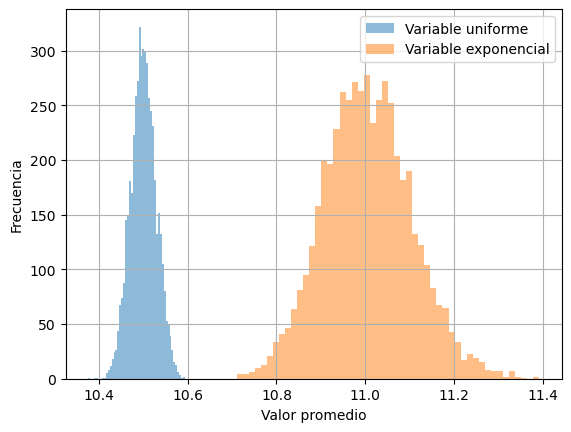

In [36]:
fig, ax = plt.subplots()

ax.hist(muestra_promedio_pob_uniforme, bins=50, alpha = 0.5, label='Variable uniforme')
ax.hist(muestra_promedio_dis_expo, bins=50, alpha = 0.5, label='Variable exponencial')

ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.legend()
ax.grid()

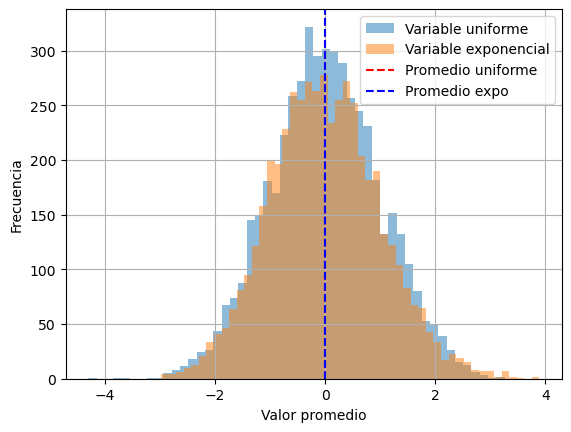

In [37]:
fig, ax = plt.subplots()

# Estandarizacion
z_uniforme = (muestra_promedio_pob_uniforme - np.mean(muestra_promedio_pob_uniforme)) / np.std(muestra_promedio_pob_uniforme)
z_expo = (muestra_promedio_dis_expo - np.mean(muestra_promedio_dis_expo)) / np.std(muestra_promedio_dis_expo)

ax.hist(z_uniforme, bins=50, alpha = 0.5, label='Variable uniforme')
ax.hist(z_expo, bins=50, alpha = 0.5, label='Variable exponencial')

ax.axvline(np.mean(z_uniforme), c='r', linestyle='--', label='Promedio uniforme')
ax.axvline(np.mean(z_expo), c='b', linestyle='--', label='Promedio expo')

ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.legend()
ax.grid()

## Estimadores muestrales


Un estimador muestral es una regla, fórmula o método que se utiliza para estimar un parámetro desconocido de una población utilizando información de una muestra aleatoria de esa población. En otras palabras, es una estadística calculada a partir de los datos de la muestra que se utiliza para hacer una estimación sobre una característica desconocida de la población.

Por ejemplo, si queremos estimar la media de una población, podemos calcular la media muestral utilizando los datos de una muestra aleatoria y utilizarla como una estimación de la media poblacional. La media muestral es un ejemplo de un estimador muestral.


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Vamos a simular que tomamos una muestra de tamaño 1. La muestra tuvo un valor de 3. Al no conocer los parametros poblacionales de la distribucion, vamos a generar una serie de hipotesis.

Supongamos tener dos medias y calculemos la probabilidad de obtener la muestra bajo la hipotesis de los parametros poblacionales (las dos medias).

In [ ]:
from scipy.stats import norm

x1 = 3

#medias
mu1 = 4
mu2 = 7
#desviacion estandar
sigma = 1
p_muestra = norm.pdf(x1, mu1, sigma)
p_muestra_2 = norm.pdf(x1, mu2, sigma)


print('La probabilidad de obtener ', x1, ' en una muestra con una media ', mu1, ' y desviacion de ', sigma, ' es ', p_muestra)
print('La probabilidad de obtener ', x1, ' en una muestra con una media ', mu2, ' y desviacion de ', sigma, ' es ', p_muestra_2)

Queremos ver la probabilidad conjunta de que ocurran dos casos x1 y x2.

In [ ]:
from scipy.stats import norm

x1 = 3
x2 = 10


#medias
mu1 = 4
mu2 = 7
#desviacion estandar
sigma = 1
p_muestra = norm.pdf(x1, mu1, sigma) * norm.pdf(x2, mu1, sigma)
p_muestra_2 = norm.pdf(x1, mu2, sigma) * norm.pdf(x2, mu2, sigma)

print('La probabilidad de obtener ', x1, 'y ', x2, ' en una muestra con una media ', mu1, ' y desviacion de ', sigma, ' es ', p_muestra)
print('La probabilidad de obtener ', x1, 'y ', x2, ' en una muestra con una media ', mu2, ' y desviacion de ', sigma, ' es ', p_muestra_2)

Obtegamos valores aleatorias de la muestra

In [ ]:
mu = 5
sigma = 1

muestra_10 = norm.rvs(mu, sigma, size = 10)
muestra_10

In [ ]:
#medias
mu1 = 4
mu2 = 7
#desviacion estandar
sigma = 1

data_1 = norm.rvs(mu1, sigma, size=100000)
data_2 = norm.rvs(mu2, sigma, size=100000)

In [ ]:
muestra_10
y = list([])

for i in range(len(muestra_10)):
  y.append(3000)

In [ ]:
ax = sns.distplot(data_1, bins = 50, color = 'blue', kde = False)
ax.set(xlabel = 'Distribucion Normal mu1', ylabel = 'Frecuencia')

ax = sns.distplot(data_2, bins = 50, color = 'red', kde = False)
ax.set(xlabel = 'Distribucion Normal mu2', ylabel = 'Frecuencia')

ax.scatter(muestra_10, y, c = 'k')

In [ ]:
fig, ax = plt.subplots()

ax.hist(data_1, bins = 50, color = 'blue', alpha=0.5)
ax.set(xlabel = 'Distribucion Normal mu1', ylabel = 'Frecuencia')

ax.hist(data_2, bins = 50, color = 'red', alpha=0.5)
ax.set(xlabel = 'Distribucion Normal mu2', ylabel = 'Frecuencia')

ax.scatter(muestra_10, y, c = 'k')

Con esto podemos ver como la muestra de 10 elementos puede pertencer con mayor probabilidad a una hipotesis respecto a la otra.

La primer hipotesis en la de color azul y la segunda hipotesis de color rojo. Los puntos obtenidos de forma aleatoria fueron graficados todos a una misma altura y podemos observar que se encuentran la mayoria dentro de la primer hipotesis.

In [ ]:
# Comparación mediante log-verosimilitud
log_like_mu1 = np.sum(norm.logpdf(muestra_10, mu1, sigma))
log_like_mu2 = np.sum(norm.logpdf(muestra_10, mu2, sigma))
print(f"Log-verosimilitud bajo H1 (mu={mu1}): {log_like_mu1:.2f}")
print(f"Log-verosimilitud bajo H2 (mu={mu2}): {log_like_mu2:.2f}")
print("La hipótesis con mayor log-verosimilitud explica mejor la muestra observada.")

## Distribuciones muestrales

Una distribución muestral es una distribución de probabilidad que describe las posibles muestras que podrían obtenerse de una población. Es decir, es la distribución de una estadística de interés (como la media, la proporción o la varianza) calculada a partir de múltiples muestras aleatorias de la misma población.

Por ejemplo, si tomamos muchas muestras aleatorias de tamaño 
�
n de una población y calculamos la media de cada una de esas muestras, obtendremos una distribución de medias muestrales. Esta distribución de medias muestrales es una distribución muestral y describe cómo varían las medias muestrales alrededor de la verdadera media poblacional.

La importancia de las distribuciones muestrales radica en que nos permiten hacer inferencias sobre los parámetros poblacionales basándonos en muestras de la población. Por ejemplo, podemos utilizar las distribuciones muestrales para construir intervalos de confianza o realizar pruebas de hipótesis sobre los parámetros poblacionales.

Es importante destacar que la forma de la distribución muestral depende del tamaño de la muestra y de la distribución de la población subyacente. Sin embargo, el Teorema del Límite Central establece que, para muestras grandes, muchas estadísticas muestrales se distribuyen aproximadamente normalmente, independientemente de la forma de la población original. Esto hace que las distribuciones muestrales sean fundamentales en estadística inferencial.

## Distribución de la media muestral
$\bar{X} \sim N\left(\mu, \frac{\sigma}{\sqrt{n}}\right)$


- $\bar{X}$: media muestral  
- $\mu$: media poblacional  
- $\sigma$: desviación estándar poblacional  
- $n$: tamaño de la muestra

Esta aproximación permite calcular probabilidades sobre la media observada usando la distribución normal y es la base del Teorema del Límite Central.

In [ ]:
import matplotlib.pyplot as plt
from IPython.core.display import Image
import seaborn as sns

%matplotlib inline

# T-student

En probabilidad y estadística, la [distribución t (de Student)](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) es una distribución de probabilidad que surge del problema de estimar la media de una población normalmente distribuida cuando el tamaño de la muestra es pequeño. 

Aparece de manera natural al realizar la prueba t de Student para la determinación de las diferencias entre dos varianzas muestrales y para la construcción del intervalo de confianza para la diferencia entre las partes de dos poblaciones cuando se desconoce la desviación típica de una población y esta debe ser estimada a partir de los datos de una muestra. 

In [ ]:
# Comparación de densidades t vs. normal estándar
from scipy.stats import t
x_vals = np.linspace(-4, 4, 400)
df_t = 10
plt.figure(figsize=(8, 4))
plt.plot(x_vals, t.pdf(x_vals, df_t), label=f't de Student (df={df_t})')
plt.plot(x_vals, norm.pdf(x_vals, 0, 1), label='Normal estándar', linestyle='--')
plt.title('Comparación entre distribución t y normal')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import t

# Generemos dos muestras aleatorias para verlas graficadas. 
data1 = t.rvs(100, size = 1000000)
data2 = t.rvs(10, size = 1000000)

ax = sns.distplot(data2, bins = 500, kde = False, color = 'blue')
ax = sns.distplot(data1, bins = 500, kde = False, color = 'red')

# Chi - cuadrado

La [distribución Chi Cuadrado](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2) o de Pearson, ésta es una distribución probabilística continua que se apoya en un parámetro que representa los grados de libertad, la utilidad de este tipo de distribución es que permite determinar la relación entre dos variables, es decir, si existe o no, dependencia estadística entre ellas.

Para poder utilizarla se deben plantear 2 hipotesis. 

Una hipotesis nula y una hipotesis alternativa. Realizando la prueba de chi-cuadrada podemos obtener cual de las hipotesis es mas probabe. Una chi-cuadrada se calcula y la otra se obtiene por [tabla](http://uregina.ca/~gingrich/appchi.pdf).

In [ ]:
from scipy.stats import chi2

# Generemos dos muestras aleatorias para verlas graficadas. 
data1 = chi2.rvs(5, size = 1000000)
data2 = chi2.rvs(15, size = 1000000)

ax = sns.distplot(data2, bins = 500, kde = False, color = 'blue')
ax = sns.distplot(data1, bins = 500, kde = False, color = 'red')

# F Fisher-Snecdecor

La [distribución F de Fisher](https://es.qwe.wiki/wiki/F-distribution) es una distribución que depende de dos parámetros. Se utiliza para evaluar la capacidad explicativa que tiene un grupo de variables independientes sobre la variación de la variable dependiente. Este test es de uso común en inferencia estadística para realizar contrastes de hipótesis.

In [ ]:
from scipy.stats import f

# Generemos dos muestras aleatorias para verlas graficadas. 
data1 = f.rvs(5, 25, size = 1000000)
data2 = f.rvs(15, 25, size = 1000000)

ax = sns.distplot(data2, bins = 500, kde = False, color = 'blue')
ax = sns.distplot(data1, bins = 500, kde = False, color = 'red')

## Calculo de probabildad

In [ ]:
# Calculo de probabilidad
# 15 y 25 son los grados de libertad de muestra x, y
# ¿que probabilidad hay de obtener un 4 en esa distribucion?
f.pdf(4,15,25) 

In [ ]:
# Calculo de probabilidad ACUMULADA

f.cdf(4,15,25) 

In [ ]:
# calculo del valor que acumula una determinada probabilidad
f.ppf(0.9988900520089906, 15, 25)

In [ ]:
# Veamos cual es el valor que acumula el 50%
f.ppf(0.5, 15, 25)

In [ ]:
# Probabilidad de cola superior complementaria en F
prob_superior = f.sf(4, 15, 25)
print(f"P(F > 4) = {prob_superior:.4f}")
print("La suma de CDF y SF en 4 se aproxima a 1, confirmando la consistencia de la distribución.")

## Ejercicios de aplicación del TLC y distribuciones muestrales

A continuación resolvemos problemas típicos de inferencia sobre la media y la varianza usando las herramientas desarrolladas en la guía.

In [ ]:
# Problema 1: Duración de bombillas
mu_bombilla = 1500
sigma_bombilla = 160
n_bombillas = 100
umbral = 1524
p_individual = norm.sf(umbral, loc=mu_bombilla, scale=sigma_bombilla)
sigma_media = sigma_bombilla / np.sqrt(n_bombillas)
p_media = norm.sf(umbral, loc=mu_bombilla, scale=sigma_media)
print(f"P(X > {umbral}) = {p_individual:.4f}")
print(f"P(\u0304X > {umbral}) = {p_media:.4f}")

x_vals = np.linspace(mu_bombilla - 4*sigma_bombilla, mu_bombilla + 4*sigma_bombilla, 400)
plt.figure(figsize=(8,4))
plt.plot(x_vals, norm.pdf(x_vals, mu_bombilla, sigma_bombilla), label='Duración individual')
plt.plot(x_vals, norm.pdf(x_vals, mu_bombilla, sigma_media), label='Media muestral (n=100)')
plt.axvline(umbral, color='red', linestyle='--', label='1524 h')
plt.fill_between(x_vals, 0, norm.pdf(x_vals, mu_bombilla, sigma_bombilla), where=(x_vals>umbral), color='orange', alpha=0.2)
plt.fill_between(x_vals, 0, norm.pdf(x_vals, mu_bombilla, sigma_media), where=(x_vals>umbral), color='blue', alpha=0.2)
plt.title('Duración de bombillas: comparación individual vs. media')
plt.xlabel('Horas')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Problema 2: Pesos de ovejas
mu_ovejas = 50
sigma_ovejas = 4
n_ovejas = 100
sigma_media_ovejas = sigma_ovejas / np.sqrt(n_ovejas)
p_media_mayor_51 = norm.sf(51, loc=mu_ovejas, scale=sigma_media_ovejas)
p_media_menor_56 = norm.cdf(56, loc=mu_ovejas, scale=sigma_media_ovejas)
p_media_mayor_49 = norm.sf(49, loc=mu_ovejas, scale=sigma_media_ovejas)
p_media_rango = norm.cdf(50.3, loc=mu_ovejas, scale=sigma_media_ovejas) - norm.cdf(49.5, loc=mu_ovejas, scale=sigma_media_ovejas)
print(f"P(\u0304X > 51) = {p_media_mayor_51:.6f}")
print(f"P(\u0304X < 56) = {p_media_menor_56:.6f}")
print(f"P(\u0304X > 49) = {p_media_mayor_49:.6f}")
print(f"P(49.5 < \u0304X < 50.3) = {p_media_rango:.6f}")

x_vals = np.linspace(48, 52, 400)
plt.figure(figsize=(8,4))
plt.plot(x_vals, norm.pdf(x_vals, mu_ovejas, sigma_media_ovejas), label='Media muestral')
plt.fill_between(x_vals, 0, norm.pdf(x_vals, mu_ovejas, sigma_media_ovejas), where=(x_vals>51), color='red', alpha=0.2, label='> 51 kg')
plt.fill_between(x_vals, 0, norm.pdf(x_vals, mu_ovejas, sigma_media_ovejas), where=(x_vals<49), color='green', alpha=0.2, label='< 49 kg')
plt.fill_between(x_vals, 0, norm.pdf(x_vals, mu_ovejas, sigma_media_ovejas), where=((x_vals>49.5)&(x_vals<50.3)), color='purple', alpha=0.2, label='49.5-50.3 kg')
plt.title('Distribución de la media muestral: pesos de ovejas')
plt.xlabel('Kilogramos')
plt.ylabel('Densidad')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Problema 3: Peso de estudiantes
mu_estudiantes = 68
sigma_estudiantes = 9
n_estudiantes = 25
umbral_media = 66
sigma_media_estudiantes = sigma_estudiantes / np.sqrt(n_estudiantes)
prob_media_baja = norm.cdf(umbral_media, loc=mu_estudiantes, scale=sigma_media_estudiantes)
muestras_totales = 300
medias_bajo_umbral = prob_media_baja * muestras_totales
print(f"P(\u0304X < {umbral_media}) = {prob_media_baja:.4f}")
print(f"Medias esperadas < {umbral_media} en {muestras_totales} muestras: {medias_bajo_umbral:.1f}")

plt.figure(figsize=(6,4))
plt.bar(['Probabilidad','Medias esperadas'], [prob_media_baja, medias_bajo_umbral], color=['steelblue','orange'])
plt.title('Resultado del problema de los estudiantes')
plt.ylabel('Valor')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Problema 4: Varianza muestral y chi-cuadrado
sigma2_poblacional = 5
n_observaciones = 17
var_muestral_objetivo = 10
chi2_observado = (n_observaciones - 1) * var_muestral_objetivo / sigma2_poblacional
prob_varianza_alta = chi2.sf(chi2_observado, df=n_observaciones - 1)
print(f"\u03C7^2 observado = {chi2_observado:.2f}")
print(f"P(S^2 > {var_muestral_objetivo}) = {prob_varianza_alta:.4f}")

x_vals = np.linspace(0, chi2_observado * 1.3, 400)
plt.figure(figsize=(8,4))
plt.plot(x_vals, chi2.pdf(x_vals, df=n_observaciones - 1), label='Chi-cuadrado (df=16)')
plt.fill_between(x_vals, 0, chi2.pdf(x_vals, df=n_observaciones - 1), where=(x_vals>chi2_observado), color='crimson', alpha=0.3, label='Región S^2 > 10')
plt.axvline(chi2_observado, color='black', linestyle='--')
plt.title('Cola superior para la varianza muestral')
plt.xlabel('$\\chi^2$')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

### Interpretación general de los ejercicios

- Las probabilidades basadas en la media muestral son más concentradas que las individuales gracias a $\sigma/\sqrt{n}$.
- El número esperado de medias en un rango se obtiene multiplicando la probabilidad por el total de muestras extraídas.
- Para hipótesis sobre la varianza se utiliza la distribución chi-cuadrado, resaltando la sensibilidad a la cola superior.
- Las gráficas ayudan a visualizar el efecto del Teorema del Límite Central y las áreas de interés en cada problema.